# Import Dependencies

In [50]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sodapy import Socrata
from datetime import datetime
import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get Data from Data.lacity.org

 - Documentation: https://data.lacity.org/A-Prosperous-City/Listing-of-Active-Businesses/6rrh-rzua
 - Label: "6rrh-rzua"

In [ ]:
# Example authenticated client (needed for non-public datasets):
MyAppToken = 's1gpVsyovUdhCzhVOCnZzNdQm'
client = Socrata("data.lacity.org",
                 MyAppToken,
                 username="dr3nf0h20ugns8nr1tyqzkz42",
                 password="4x4c3k4lhiowphlbs1t52ezc4psshb1fg9ck9fbdii1ok925qu")

In [ ]:
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
# columns = '''
# business_name, street_address, city, zip_code, 
# location_description, primary_naics_description, council_district, 
# location_start_date, location_1
# '''
# dates = '''location_start_date BETWEEN '2015-01-10T12:00:00' AND '2020-07-15T12:00:00'
# '''
# results = client.get("6rrh-rzua",select=columns, where=dates, offset=1000, limit=500000)

In [ ]:
# Convert to pandas DataFrame
# df = pd.DataFrame.from_records(results)

In [ ]:
# df = pd.concat([df.drop(['location_1'], axis=1), df['location_1'].apply(pd.Series)], axis=1)
# df.drop(columns=[0,'human_address'], inplace =True)

In [ ]:
# df['location_start_date'] = df['location_start_date'].astype('datetime64[ns]') 

In [ ]:
# df.dropna(subset=['location_start_date'], inplace=True)

In [ ]:
# df['start_year'] = pd.DatetimeIndex(df['location_start_date']).year
# df['month_year'] = pd.to_datetime(df['location_start_date']).dt.to_period('M')

In [ ]:
# Save File
df.to_csv("/Users/trinitycisneros/Documents/Coding/bitterscientist.com/la_active_bus.csv", index=False)

In [2]:
file = "/Users/trinitycisneros/Documents/Coding/bitterscientist.com/la_active_bus.csv"
df = pd.read_csv(file)

In [58]:
path = 'images'
try:
    os.mkdir(os.path.join(os.getcwd(), 'images'))
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory images 


# Questions

 - How have the number of new businesses per year changed
 - What is the percent change of new business per year
 - What are the time cohorts and their percent change per year
 - Does the business classification affect the number of new business per year?
 - Which are the cities with the highest number of new businesses?
 - How have the number of new businesses changed over the years for these top cities?

# Total number of active business by year between 2015 - 2020

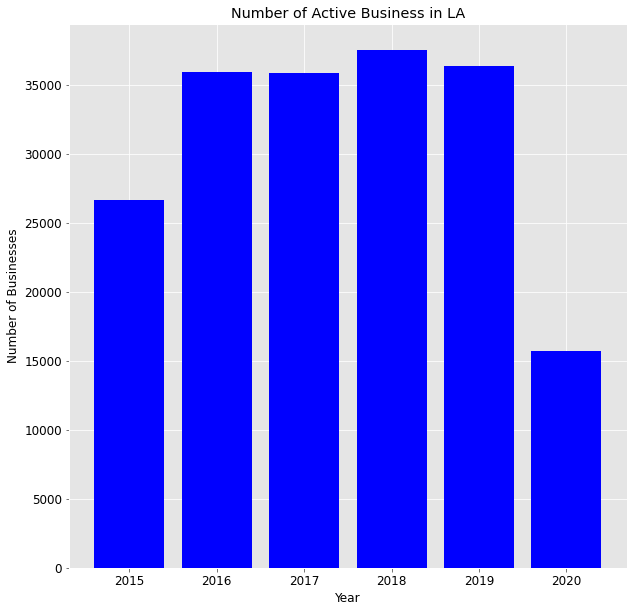

In [36]:
act_by_year = df.groupby("start_year").size()
%matplotlib inline
plt.style.use('ggplot')

x = act_by_year.index.values
nbr_businesses = act_by_year.values
x_pos = [i for i, _ in enumerate(x)]

fig, axes = plt.subplots(1,1, figsize=(10,10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
axes.bar(x_pos, nbr_businesses, color='blue')
axes.set_xlabel("Year", color="black")
axes.set_ylabel("Number of Businesses", color="black")
axes.set_title("Number of Active Business in LA",color="black")
axes.set_xticks(range(6))
axes.set_xticklabels([year for year in x], color="black")
axes.tick_params(axis="y", labelsize=12, labelcolor="black")
axes.tick_params(axis="x", labelsize=12, labelcolor="black")

plt.show()

<hr style='border-top: 4px solid black;'>

## Total number of active business by city per year

In [11]:
# Prepare a dataframe that only contains the city, year, and number of businesses
city_numbers_df = df.groupby(['city', 'start_year']).size()
city_numbers_df = city_numbers_df.reset_index()
city_numbers_df.columns = ["city", "year", "count"]

# Find out which of these cities have the highest number of new businesses and filter for the top 20
top_20_cities = city_numbers_df.groupby('city')["count"].sum().sort_values(ascending=False).nlargest(20)
top_20_city_names = top_20_cities.index.values
top_20_city_names

array(['LOS ANGELES', 'VAN NUYS', 'NORTH HOLLYWOOD', 'SHERMAN OAKS',
       'WOODLAND HILLS', 'ENCINO', 'NORTHRIDGE', 'STUDIO CITY',
       'CANOGA PARK', 'RESEDA', 'TARZANA', 'VENICE', 'PANORAMA CITY',
       'SYLMAR', 'SAN PEDRO', 'SUN VALLEY', 'GRANADA HILLS', 'CHATSWORTH',
       'VALLEY VILLAGE', 'PACOIMA'], dtype=object)

# Filter <font color="red">df</font> dataframe so that it only include the 20 cities with the highest number of new businesses <font color="red">top_20_df</font> 

In [12]:
# Dataframe that contains only the top 20 cities
top_20_df = df[df['city'].isin(top_20_city_names)]

## Groupby new filtered dataframe by start year and city, and then count the 'start year'

In [13]:
top_20_cities_df = top_20_df.groupby(["start_year", "city"])["start_year"].agg(["count"])
top_20_cities_df = top_20_cities_df.reset_index()

In [14]:
# Create a pivot table from the groupby dataframe
table = pd.pivot_table(top_20_cities_df, values='count', index='city', columns=['start_year'], aggfunc='sum')
table

start_year,2015,2016,2017,2018,2019,2020
city,,,,,,
CANOGA PARK,274,445,447,470,467,182
CHATSWORTH,233,297,310,315,279,101
ENCINO,590,686,675,759,672,213
GRANADA HILLS,231,342,301,307,321,114
LOS ANGELES,13318,17874,17667,18241,17113,7296
NORTH HOLLYWOOD,936,1241,1255,1256,1208,560
NORTHRIDGE,381,553,527,557,528,239
PACOIMA,200,271,251,290,263,116
PANORAMA CITY,249,375,343,316,364,167


In [15]:
pct_change_table = table.pct_change(axis='columns')*100
pct_change_table

start_year,2015,2016,2017,2018,2019,2020
city,,,,,,
CANOGA PARK,NaN,62.408759,0.449438,5.145414,-0.638298,-61.027837
CHATSWORTH,NaN,27.467811,4.377104,1.612903,-11.428571,-63.799283
ENCINO,NaN,16.271186,-1.603499,12.444444,-11.462451,-68.303571
GRANADA HILLS,NaN,48.051948,-11.988304,1.993355,4.560261,-64.485981
LOS ANGELES,NaN,34.209341,-1.158107,3.248995,-6.183871,-57.365745
NORTH HOLLYWOOD,NaN,32.585470,1.128122,0.079681,-3.821656,-53.642384
NORTHRIDGE,NaN,45.144357,-4.701627,5.692600,-5.206463,-54.734848
PACOIMA,NaN,35.500000,-7.380074,15.537849,-9.310345,-55.893536
PANORAMA CITY,NaN,50.602410,-8.533333,-7.871720,15.189873,-54.120879


<hr style='border-top: 4px solid black;'>

# Plot the change in the number of businesses by year

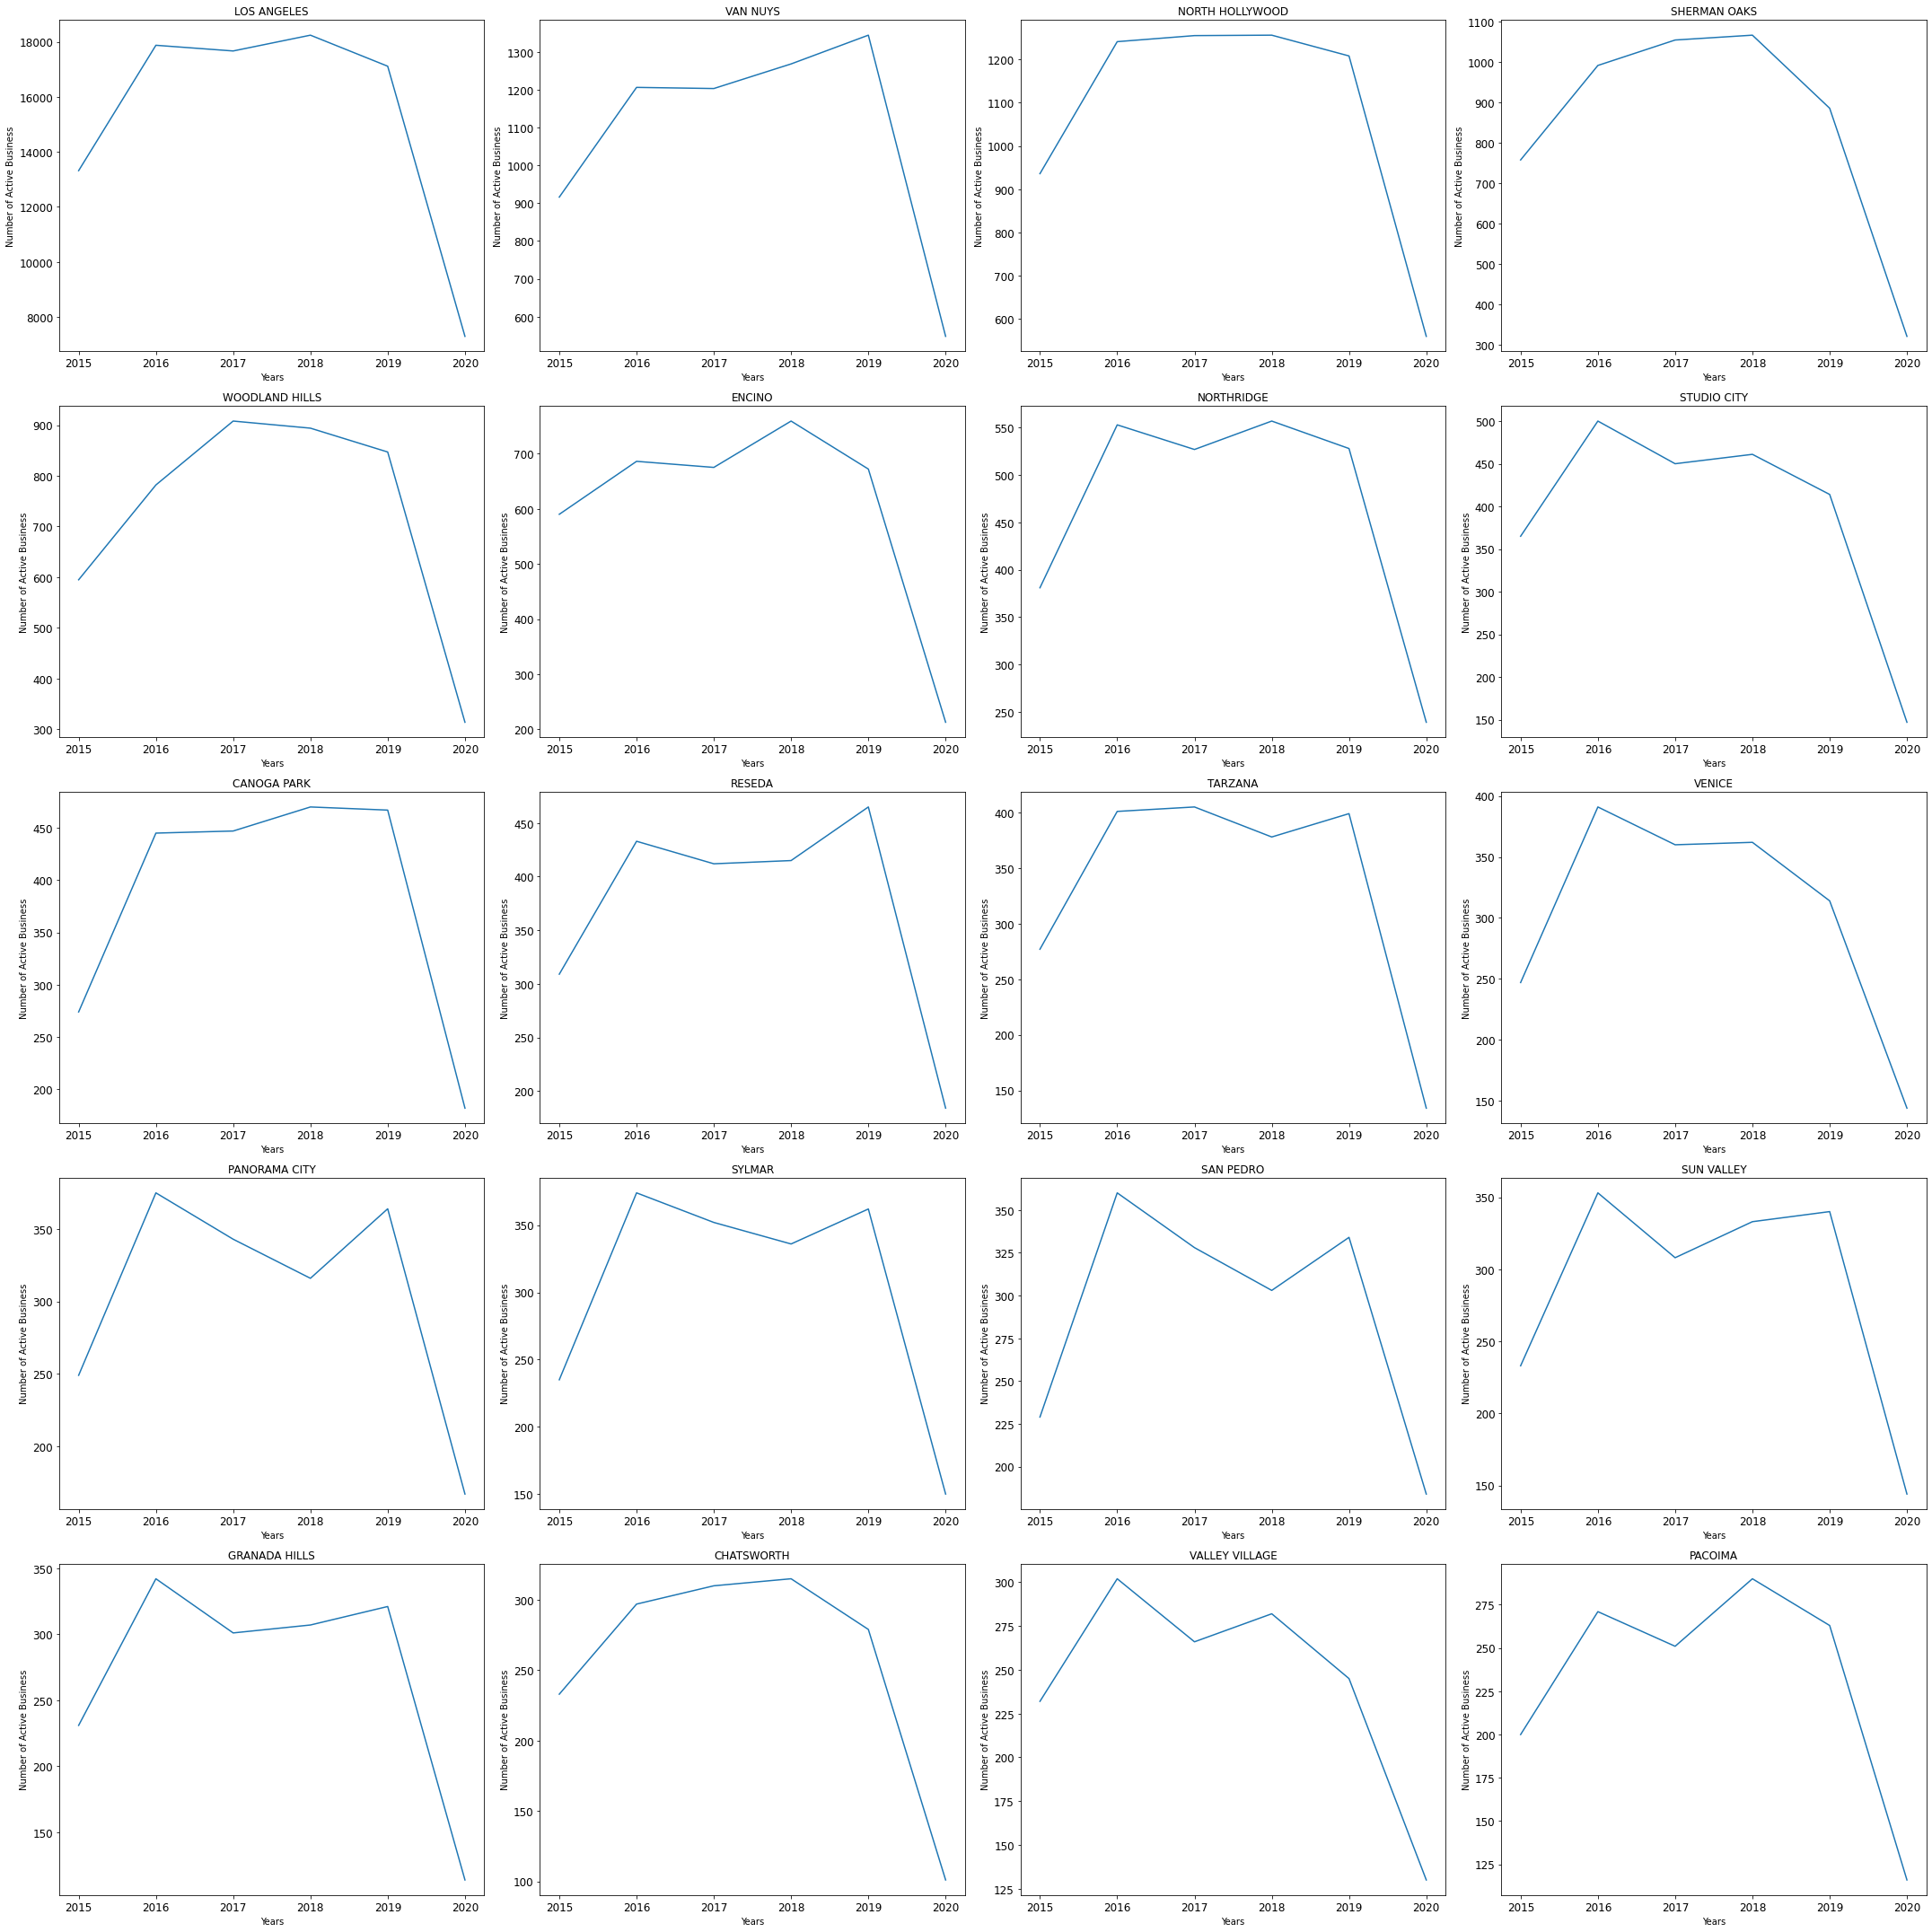

In [16]:
nbr_cities = len(top_20_city_names)
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(hspace=1, wspace=0.2)
for city, num in zip(top_20_city_names, range(1,nbr_cities+1)):
    
    # Gets the data for the individual city
    city_df=df[df['city']==city]
    city_year_data = city_df.groupby('start_year').size()
    years = city_year_data.index.values
    number_businesses = city_year_data.values
    
    ax = fig.add_subplot(5,4, num)
    ax.plot(years, number_businesses)
    ax.set_ylabel('Number of Active Business', color="black")
    ax.set_xlabel('Years', color="black")
    ax.set_title(city)
    ax.tick_params(axis="y", labelsize=12, labelcolor="black")
    ax.tick_params(axis="x", labelsize=12, labelcolor="black")

plt.tight_layout()
plt.show()

<hr style='border-top: 4px solid black;'>

# Trends in the number of new business by month-year for entire dataset <font color="red">df</font>

In [34]:
# Filter for events after jan-2019
df_2019_2020 = df[df["month_year"] >= "2019-01"]
businesses_19_20 = df_2019_2020.groupby("month_year")["business_name"].agg(['count'])

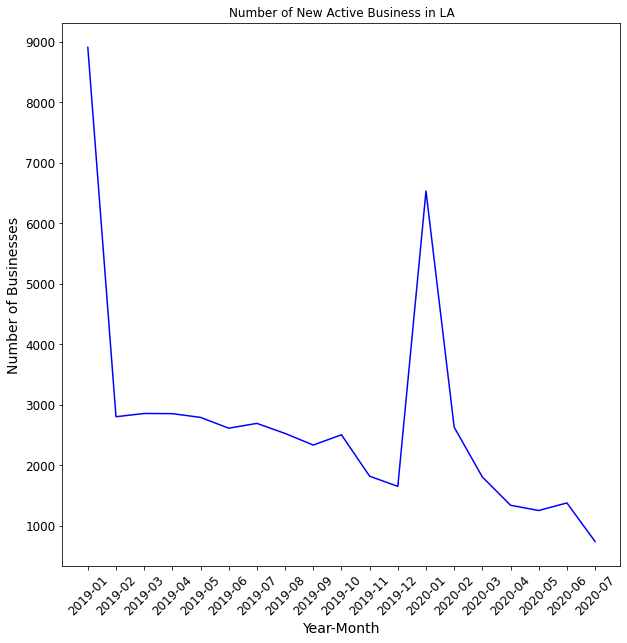

In [35]:
time = businesses_19_20.index.values
nbr_businesses = businesses_19_20.values

fig, axes = plt.subplots(1,1, figsize=(10,10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
axes.plot(time, nbr_businesses, color='blue')
axes.set_xlabel("Year-Month", color="black", fontsize=14)
axes.set_ylabel("Number of Businesses", color="black", fontsize=14)
axes.set_title("Number of New Active Business in LA",color="black")
axes.tick_params(axis="y", labelsize=12, labelcolor="black")
axes.tick_params(axis="x", labelsize=12, labelcolor="black", labelrotation=45)

plt.show()

<hr style='border-top: 4px solid black;'>

# Is there a difference in the number of new businesses by clasification? 

In [44]:
top_naics_desc = df['primary_naics_description'].value_counts()[:10].to_frame()
top_naics_desc

,primary_naics_description
All other personal services,14933
"Independent artists, writers, & performers",11343
Lessors of real estate (including mini warehouses & self-storage units),6700
Single Family Housing Construction (1997 NAICS),6677
Motion picture & video industries (except video rental),5276
"All other professional, scientific, & technical services",4781
"Management, scientific, & technical consulting services",4345
Janitorial services,3857
All other specialty trade contractors,3049
Full-service restaurants,2770


In [53]:
top_10_naics_names = top_naics_desc.index.values
top_10_naics_names

array(['All other personal services',
       'Independent artists, writers, & performers',
       'Lessors of real estate (including mini warehouses & self-storage units)',
       'Single Family Housing Construction (1997 NAICS)',
       'Motion picture & video industries (except video rental)',
       'All other professional, scientific, & technical services',
       'Management, scientific, & technical consulting services',
       'Janitorial services', 'All other specialty trade contractors',
       'Full-service restaurants'], dtype=object)

In [54]:
# Dataframe that contains only the top 10 naics
top_10_naics_df = df[df['primary_naics_description'].isin(top_10_naics_names)]

In [55]:
top_10_naics_groupby = top_10_naics_df.groupby(["start_year", "primary_naics_description"])["start_year"].agg(["count"])
top_10_naics_groupby = top_10_naics_groupby.reset_index()

In [56]:
# Create a pivot table from the groupby dataframe
table_naics = pd.pivot_table(top_10_naics_groupby, values='count', index='primary_naics_description', columns=['start_year'], aggfunc='sum')
table_naics

start_year,2015,2016,2017,2018,2019,2020
primary_naics_description,,,,,,
All other personal services,2091,3156,2940,3069,2607,1070
"All other professional, scientific, & technical services",790,987,923,1004,776,301
All other specialty trade contractors,333,516,512,644,780,264
Full-service restaurants,322,435,575,603,613,222
"Independent artists, writers, & performers",1592,2488,2120,2613,1857,673
Janitorial services,537,866,708,745,736,265
Lessors of real estate (including mini warehouses & self-storage units),1371,1586,1478,1209,861,195
"Management, scientific, & technical consulting services",761,1102,869,741,638,234
Motion picture & video industries (except video rental),921,1270,1074,1036,763,212


In [57]:
pct_change_table_naics = table_naics.pct_change(axis='columns')*100
pct_change_table_naics

start_year,2015,2016,2017,2018,2019,2020
primary_naics_description,,,,,,
All other personal services,NaN,50.932568,-6.844106,4.387755,-15.053763,-58.956655
"All other professional, scientific, & technical services",NaN,24.936709,-6.484296,8.775731,-22.709163,-61.211340
All other specialty trade contractors,NaN,54.954955,-0.775194,25.781250,21.118012,-66.153846
Full-service restaurants,NaN,35.093168,32.183908,4.869565,1.658375,-63.784666
"Independent artists, writers, & performers",NaN,56.281407,-14.790997,23.254717,-28.932262,-63.758751
Janitorial services,NaN,61.266294,-18.244804,5.225989,-1.208054,-63.994565
Lessors of real estate (including mini warehouses & self-storage units),NaN,15.681984,-6.809584,-18.200271,-28.784119,-77.351916
"Management, scientific, & technical consulting services",NaN,44.809461,-21.143376,-14.729574,-13.900135,-63.322884
Motion picture & video industries (except video rental),NaN,37.893594,-15.433071,-3.538175,-26.351351,-72.214941
